# Question and problem definition

who survived or did not survive the Titanic disaster ??

the answer to that question is create a model that determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.


# workflow

1- data exploration & data visualization
2- data preprocessing
3- apply algorithms
4- model evaluation

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [86]:
x_train = pd.read_csv("../datasets/titanic dataset/train.csv")
x_test = pd.read_csv("../datasets/titanic dataset/test.csv")
y_test = pd.read_csv("../datasets/titanic dataset/gender_submission.csv")
combine=[x_train,x_test]

# data exploration & data visualization

In [87]:
x_train.info()
print('_'*20)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    

In [88]:
x_train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [89]:
x_test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [90]:
#function for each feature(datatype & null )
def data_info(data):
    total_null = data.isnull().sum()
    tt=pd.DataFrame(total_null,columns=["n_null"])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt.sort_values(by="n_null",ascending=False)))

In [91]:
missing_data(x_train)

,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
n_null,687,177,2,0,0,0,0,0,0,0,0,0
Types,object,float64,object,int64,int64,int64,object,object,int64,int64,object,float64


In [92]:
missing_data(x_test)

,Cabin,Age,Fare,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
n_null,327,86,1,0,0,0,0,0,0,0,0
Types,object,float64,float64,int64,int64,object,object,int64,int64,object,object


In [93]:
#describe numerical data
x_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
#describe categorical data 
x_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"O'Leary, Miss. Hanora ""Norah""",male,347082,G6,S
freq,1,577,7,4,644


In [95]:
#correlation between features 
x_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [96]:
x_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [97]:
x_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [98]:
x_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


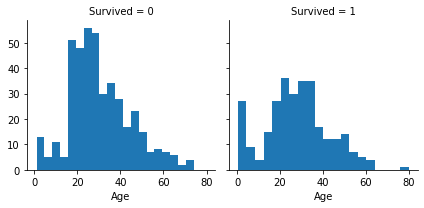

In [99]:
g = sns.FacetGrid(x_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

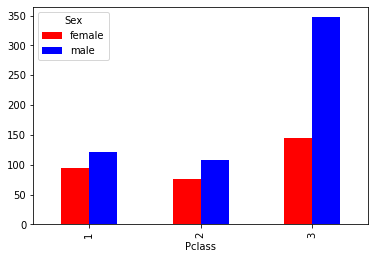

In [100]:
temp1= pd.crosstab(x_train["Pclass"],x_train["Sex"])
temp1.plot(kind="bar",color=['red','blue'])#,grid=False)

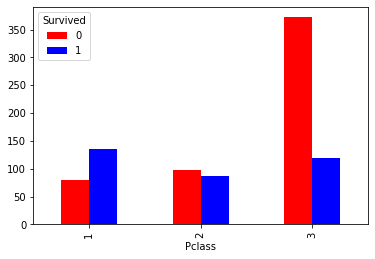

In [101]:
temp1= pd.crosstab(x_train["Pclass"],x_train["Survived"])
temp1.plot(kind="bar",color=['red','blue'])#,grid=False)

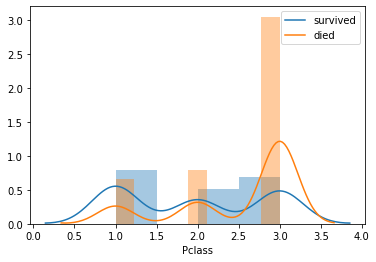

In [102]:
sns.distplot(x_train.loc[x_train["Survived"]==1]["Pclass"],kde_kws={"label":"survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Pclass"],kde_kws={"label":"died"})

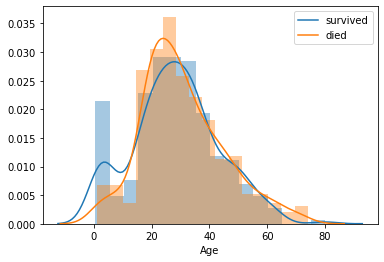

In [103]:
sns.distplot(x_train.loc[x_train["Survived"]==1]["Age"],kde_kws={"label":"survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Age"],kde_kws={"label":"died"})

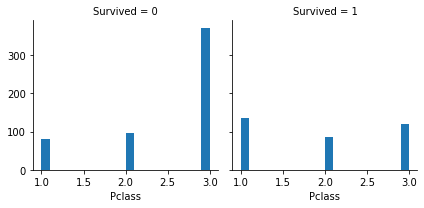

In [104]:
g = sns.FacetGrid(x_train, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

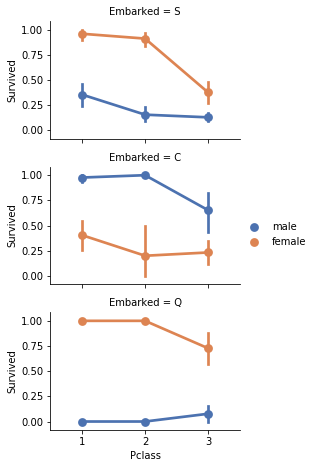

In [105]:
grid = sns.FacetGrid(x_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

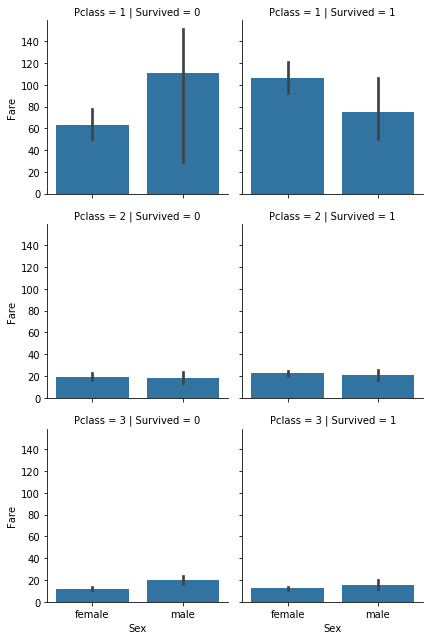

In [106]:
#correlation for categorical data
grid = sns.FacetGrid(x_train, row='Pclass', col='Survived')
grid.map(sns.barplot, 'Sex','Fare')
grid.add_legend()

# preprocessing

the first thing is to get rid of unimportant feature like  

In [107]:
x_train=x_train.drop(["Cabin","Ticket"],axis=1)
x_test=x_test.drop(["Cabin","Ticket"],axis=1)
combine=[x_train,x_test]

the name feature should be not important but maybe the title in the name is important 
so add a new feature will be better 

In [108]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [109]:
[x_train,x_test]=combine
pd.crosstab(x_train['Title'], x_train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [110]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [111]:
[x_train,x_test]=combine
pd.crosstab(x_train['Title'], x_train['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,8


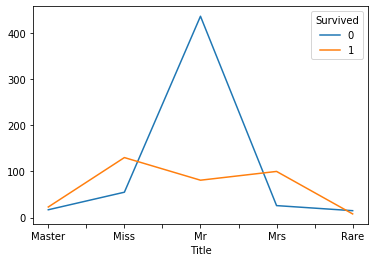

In [112]:
pd.crosstab(x_train['Title'], x_train['Survived']).plot()

In [113]:
x_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [114]:
#get rid of un important feature
x_train=x_train.drop(["PassengerId","Name"],axis=1)
x_test=x_test.drop(["PassengerId","Name"],axis=1)  
combine=[x_train,x_test]

## handling categorical feature

In [115]:
#x_train=pd.get_dummies(x_train)
#x_test=pd.get_dummies(x_test)

In [116]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [117]:
Embarked_mapping = {'S': 0, 'C': 1,'Q':2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)

#another way is using pd.factorize method
#x_train["Embarked"]=pd.factorize(x_train["Embarked"])[0]
#x_test["Embarked"]=pd.factorize(x_test["Embarked"])[0]

In [118]:
[x_train,x_test]=combine

In [119]:
combine

[     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
 0           0       3    0  22.0      1      0   7.2500       0.0      1
 1           1       1    1  38.0      1      0  71.2833       1.0      3
 2           1       3    1  26.0      0      0   7.9250       0.0      2
 3           1       1    1  35.0      1      0  53.1000       0.0      3
 4           0       3    0  35.0      0      0   8.0500       0.0      1
 ..        ...     ...  ...   ...    ...    ...      ...       ...    ...
 886         0       2    0  27.0      0      0  13.0000       0.0      5
 887         1       1    1  19.0      0      0  30.0000       0.0      2
 888         0       3    1   NaN      1      2  23.4500       0.0      2
 889         1       1    0  26.0      0      0  30.0000       1.0      1
 890         0       3    0  32.0      0      0   7.7500       2.0      1
 
 [891 rows x 9 columns],
      Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Title
 0         3    0  3

## missing values

In [120]:
#a way that need more work
#ages=x_train[['Pclass','Sex','Survived','Age']].groupby(['Pclass','Sex','Survived'], as_index=False).median().sort_values(by=['Pclass','Sex','Survived'])
#x_train[['Pclass','Sex','Survived']]== [1,1,1]
#x_train.loc[x_train[['Pclass','Sex','Survived']]== [1,1,1]==[,'Age']

In [121]:
#empty array with ages based on pclass and sex
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [122]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

In [123]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0.0,1
1,1,1,1,38,1,0,71.2833,1.0,3
2,1,3,1,26,0,0,7.9250,0.0,2
3,1,1,1,35,1,0,53.1000,0.0,3
4,0,3,0,35,0,0,8.0500,0.0,1


In [124]:
x_train["AgeSec"]=pd.cut(x_train["Age"],5)
x_test["AgeSec"]=pd.cut(x_test["Age"],5)

In [125]:
x_train[["AgeSec","Survived"]].groupby(["AgeSec"]).mean().sort_values(["Survived"],ascending=False)

,Survived
AgeSec,
"(-0.08, 16.0]",0.550000
"(48.0, 64.0]",0.434783
"(32.0, 48.0]",0.412037
"(16.0, 32.0]",0.337374
"(64.0, 80.0]",0.090909


In [126]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
[x_train,x_test]=combine

In [127]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title  \
 0           0       3    0    1      1      0   7.2500       0.0      1   
 1           1       1    1    2      1      0  71.2833       1.0      3   
 2           1       3    1    1      0      0   7.9250       0.0      2   
 3           1       1    1    2      1      0  53.1000       0.0      3   
 4           0       3    0    2      0      0   8.0500       0.0      1   
 ..        ...     ...  ...  ...    ...    ...      ...       ...    ...   
 886         0       2    0    1      0      0  13.0000       0.0      5   
 887         1       1    1    1      0      0  30.0000       0.0      2   
 888         0       3    1    1      1      2  23.4500       0.0      2   
 889         1       1    0    1      0      0  30.0000       1.0      1   
 890         0       3    0    1      0      0   7.7500       2.0      1   
 
            AgeSec  
 0    (16.0, 32.0]  
 1    (32.0, 48.0]  
 2    (16.0, 32.0]  
 3

In [128]:
x_train=x_train.drop(["AgeSec"],axis=1)
x_test=x_test.drop(["AgeSec"],axis=1)
combine=[x_train,x_test]

In [129]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
[x_train,x_test]=combine
x_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [130]:
for dataset in combine:
    dataset['isalone']=0 
    dataset.loc[dataset['FamilySize']==1,'isalone']=1
[x_train,x_test]=combine

In [131]:
x_train[["isalone","Survived"]].groupby(["isalone"]).mean().sort_values(["Survived"],ascending=False)

,Survived
isalone,
0,0.505650
1,0.303538


In [132]:
x_train=x_train.drop(["SibSp","Parch"],axis=1)
x_test=x_test.drop(["SibSp","Parch"],axis=1)
combine=[x_train,x_test]
combine

[     Survived  Pclass  Sex  Age     Fare  Embarked  Title  FamilySize  isalone
 0           0       3    0    1   7.2500       0.0      1           2        0
 1           1       1    1    2  71.2833       1.0      3           2        0
 2           1       3    1    1   7.9250       0.0      2           1        1
 3           1       1    1    2  53.1000       0.0      3           2        0
 4           0       3    0    2   8.0500       0.0      1           1        1
 ..        ...     ...  ...  ...      ...       ...    ...         ...      ...
 886         0       2    0    1  13.0000       0.0      5           1        1
 887         1       1    1    1  30.0000       0.0      2           1        1
 888         0       3    1    1  23.4500       0.0      2           4        0
 889         1       1    0    1  30.0000       1.0      1           1        1
 890         0       3    0    1   7.7500       2.0      1           1        1
 
 [891 rows x 9 columns],
      Pclass 

In [133]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].dropna().mode()[0])
[x_train,x_test]=combine

In [134]:
x_train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isalone
0,0,3,0,1,7.2500,0.0,1,2,0
1,1,1,1,2,71.2833,1.0,3,2,0


In [135]:
x_test['Fare'].fillna(x_test['Fare'].dropna().median(), inplace=True)
x_train['Fare'].fillna(x_train['Fare'].dropna().median(), inplace=True)

In [136]:
x_train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isalone
0,0,3,0,1,7.2500,0.0,1,2,0
1,1,1,1,2,71.2833,1.0,3,2,0


In [137]:
combine=[x_train,x_test]

In [138]:
#devide into 4 sector
x_train['FareBand'] = pd.qcut(x_train['Fare'], 4)
x_train['FareBand']

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: FareBand, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [140]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
[x_train, x_test]= combine

In [141]:
x_train = x_train.drop(['FareBand'], axis=1)
combine = [x_train, x_test]

In [142]:
x_train.head(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isalone
0,0,3,0,1,0,0.0,1,2,0
1,1,1,1,2,0,1.0,3,2,0
2,1,3,1,1,0,0.0,2,1,1
3,1,1,1,2,0,0.0,3,2,0


In [144]:
#correlation between features it's a good way 
features=x_train.columns.values
correlations = x_train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,FamilySize,Survived,0.016639
1,Survived,FamilySize,0.016639
2,isalone,Embarked,0.017807
3,Embarked,isalone,0.017807
4,Age,Survived,0.037059
5,Survived,Age,0.037059
6,Title,Embarked,0.045400
7,Embarked,Title,0.045400
8,Embarked,Pclass,0.045702
9,Pclass,Embarked,0.045702


# apply algorithm

In [ ]:
y_train=x_train["Survived"]

In [ ]:
y_train=pd.DataFrame(y_train,columns=['Survived'])

In [ ]:
y_train.head(2)

In [ ]:
x_train=x_train.drop("Survived",axis=1)
x_train.head(2)

In [ ]:
x_test.head(2)

In [ ]:
y_test=y_test.drop("PassengerId",axis=1)
y_test.head(2)

In [ ]:
x_train.shape,y_train.shape,x_test.shape

## logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(x_train,y_train.values.ravel())
logreg_pred=logreg.predict(x_test)
acc_log=round(logreg.score(x_train, y_train) * 100, 2)
acc_log

In [ ]:
#calculate correlation between model output and features with logistic regression .coef_
coeff_df = pd.DataFrame(x_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
model_feature_corr= coeff_df.sort_values(by='Correlation', ascending=False)
print(model_feature_corr)
sns.barplot(model_feature_corr["Correlation"],model_feature_corr["Feature"])

# SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train.values.ravel())
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train.values.ravel())
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train.values.ravel())
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train.values.ravel())
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train.values.ravel())
Y_pred = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

# XGBoosting

In [ ]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_estimators=1000,learning_rate=0.05)
XGB_model.fit(x_train,y_train.values.ravel())
pred3 = XGB_model.predict(x_test)
acc_XGB = round(XGB_model.score(x_train, y_train) * 100, 2)
acc_XGB

# model evaluation

In [124]:
#choose the best model
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','XGB'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,acc_decision_tree,acc_XGB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.55
5,Decision Tree,88.55
6,XGB,88.22
1,KNN,85.75
0,Support Vector Machines,83.39
2,Logistic Regression,81.59
4,Naive Bayes,79.69


# cross validation

In [121]:
#cross_validation
from sklearn.model_selection import cross_val_score
logreg_cv=cross_val_score(random_forest,x_train,y_train.values.ravel(),cv=5)
logreg_cv.mean()

0.8058565061829139